In [6]:
%matplotlib ipympl
import numpy as np
from numpy import cos, sin, pi, abs 
import matplotlib.pyplot as plt 

def brewster(n1, n2):
    return np.arctan(n2/n1)

def critical(n1, n2):
    return np.arcsin(n2/n1)

def r_coef_pal(n1, n2, t1, t2):
    return (n1*cos(t2) - n2*cos(t1)) / (n1*cos(t2) + n2*cos(t1))

def t_coef_pal(n1, n2, t1, t2):
    return (2*n1*cos(t1)) / (n1 * cos(t2) + n2 * cos(t1))

def r_coef_perp(n1, n2, t1, t2):
    return (n1*cos(t1) - n2*cos(t2)) / (n1*cos(t1) + n2*cos(t2))

def t_coef_perp(n1, n2, t1, t2):
    return (2*n1*cos(t1)) / (n1 * cos(t1) + n2 * cos(t2))


# Q3 - fresnel coefficients 

n1=1.50, n2=1.00
critical_ang=41.81
brewster_ang=33.69
n1=1.50, n2=1.30
critical_ang=60.07
brewster_ang=40.91
n1=1.50, n2=1.48
critical_ang=81.89
brewster_ang=44.71


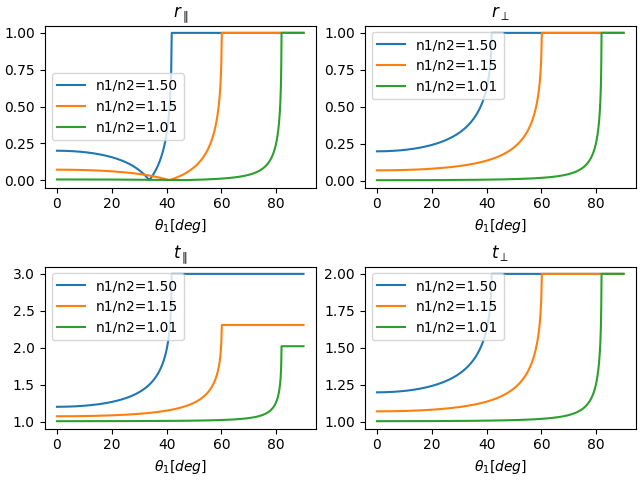

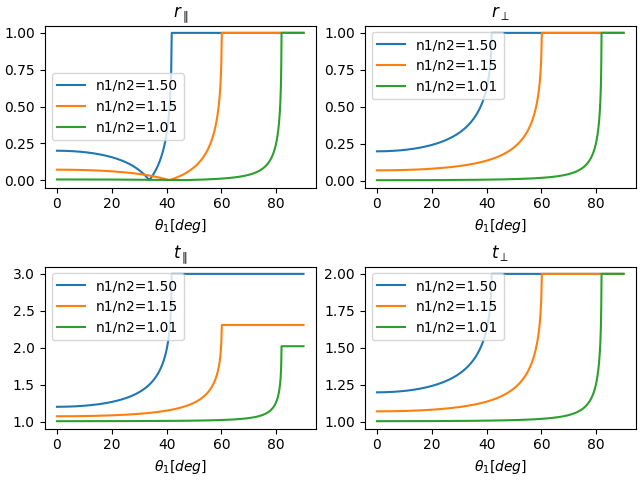

In [35]:
flag = False 
if flag:
    n1s = [1, 1.3, 1.5*0.99]
    n2s = [1.5]
else:
    n1s = [1.5]
    n2s = [1, 1.3, 1.5*0.99]

theta1s = np.linspace(0, pi/2-0.001, 1000, dtype=np.complex128)
fig, axes = plt.subplots(2, 2, constrained_layout=True)
for n1 in n1s:
    for n2 in n2s:
        theta2s = np.ones_like(theta1s, dtype=np.complex128)*np.pi/2  # Allow for complex values
        valid = np.sin(theta1s) < (n2/n1)  # Valid range for arcsin 
        theta2s[valid] = np.arcsin((n1/n2) * np.sin(theta1s[valid]))
        # theta2s = np.arcsin((n1/n2) * np.sin(theta1s))
        r_pal = r_coef_pal(n1, n2, theta1s, theta2s)
        t_pal = t_coef_pal(n1, n2, theta1s, theta2s)
        r_perp = r_coef_perp(n1, n2, theta1s, theta2s)
        t_perp = t_coef_perp(n1, n2, theta1s, theta2s)
        
        brewster_ang = brewster(n1, n2) * 180/pi
        critical_ang = critical(n1, n2) * 180/pi
        
        theta_degs = theta1s *180/np.pi
        axes[0,0].set_title('$r_{\parallel}$')
        axes[0,0].set_xlabel(r'$\theta_1 [deg]$')
        axes[0,0].plot(theta_degs, abs(r_pal), label=f'{n1/n2=:.2f}')
        # axes[0,0].set_xlim((0, pi/2-0.001))
        axes[0,0].legend()
        
        axes[0,1].set_title('$r_{\perp}$')
        axes[0,1].set_xlabel(r'$\theta_1 [deg]$')
        axes[0,1].plot(theta_degs, abs(r_perp), label=f'{n1/n2=:.2f}')
        axes[0,1].legend()
        
        axes[1,0].set_title('$t_{\parallel}$')
        axes[1,0].set_xlabel(r'$\theta_1 [deg]$')
        axes[1,0].plot(theta_degs, abs(t_pal), label=f'{n1/n2=:.2f}')
        axes[1,0].legend()
        
        axes[1,1].set_title('$t_{\perp}$')
        axes[1,1].set_xlabel(r'$\theta_1 [deg]$')
        axes[1,1].plot(theta_degs, abs(t_perp), label=f'{n1/n2=:.2f}')
        axes[1,1].legend()
        print(f'{n1=:.2f}, {n2=:.2f}')
        print(f'{critical_ang=:.2f}')
        print(f'{brewster_ang=:.2f}')
    fig.show()

# Q4 

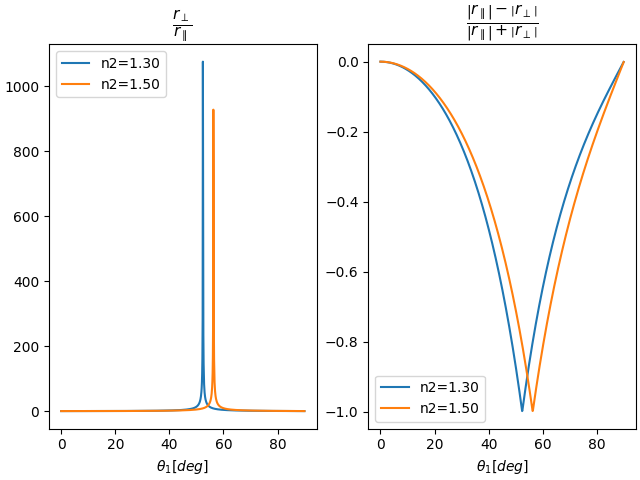

In [19]:
n1 =1 
n2s = [1.3, 1.5]

theta1s = np.linspace(0, pi/2-0.001, 1000)
fig, axes = plt.subplots(1, 2, constrained_layout=True)

for n2 in n2s:
    theta2s = np.ones_like(theta1s, dtype=np.complex128)*np.pi/2  # Allow for complex values
    valid = np.sin(theta1s) < (n2/n1)  # Valid range for arcsin 
    theta2s[valid] = np.arcsin( (n1/n2) * np.sin(theta1s[valid]) )
    
    r_pal = abs(r_coef_pal(n1, n2, theta1s, theta2s))
    r_perp = abs(r_coef_perp(n1, n2, theta1s, theta2s))
    
    theta_degs = theta1s *180/np.pi
    axes[0].set_title(r'$\frac{r_{\perp}}{r_{\parallel}}$', fontsize=16, fontweight='bold')
    axes[0].set_xlabel(r'$\theta_1 [deg]$')
    axes[0].plot(theta_degs, r_perp/r_pal, label=f'{n2=:.2f}')
    axes[0].legend()
    
    axes[1].set_title(r'$\frac{\left|r_{\parallel}\right|-\left|r_{\perp}\right|}{\left|r_{\parallel}\right|+\left|r_{\perp}\right|}$', fontsize=16, fontweight='bold')
    axes[1].set_xlabel(r'$\theta_1 [deg]$')
    axes[1].plot(theta_degs, (r_pal-r_perp)/(r_pal+r_perp), label=f'{n2=:.2f}')
    axes[1].legend()

# Q7

In [36]:
n1 = 1 
n1um = 0.22769 + 6.4731j
n055um = 0.42415 + 2.4721j
n02um = 1.3300 + 1.2555j 


print(fr'theta_1=0')
for n2 in [n1um, n055um, n02um]:
    r_pal = r_coef_pal(n1, n2, 0, 0)
    r_perp = r_coef_perp(n1, n2, 0, 0)
    print(f'{r_pal=:.2f}, {r_perp=:.2f}')
    
print(fr'theta_1=pi/4')
for n2 in [n1um, n055um, n02um]:
    theta2_45 = np.arcsin((n1/n055um) * np.sin(45*pi/180))
    r_pal = r_coef_pal(n1, n2, pi/4, theta2_45)
    r_perp = r_coef_perp(n1, n2, pi/4, theta2_45)
    print(f'{r_pal=:.3f}, {r_perp=:.3f}')

theta_1=0
r_pal=-0.94-0.30j, r_perp=-0.94-0.30j
r_pal=-0.65-0.61j, r_perp=-0.65-0.61j
r_pal=-0.33-0.36j, r_perp=-0.33-0.36j
theta_1=pi/4
r_pal=-0.884-0.422j, r_perp=-0.973-0.207j
r_pal=-0.424-0.740j, r_perp=-0.799-0.463j
r_pal=-0.127-0.385j, r_perp=-0.514-0.310j
